# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

**RFM stands for Recency, Frequency, and Monetary value**

❓ Can you summarize what each metric measures in one sentence?

**Method of analyzing the quality of a customer according to three criteria :**  

**Recency: date of the last purchase or time elapsed since.(The most the recent purchases the better score will be)   
Frequency: average frequency of purchases over the period considered.(The more frequent purchase the better score will be)  
Value: amount of purchases made by this customer over the period studied.(The more they spend the better score will be)**

❓ What data / or type of data do you need for each metric ? 

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv('../projets_clients_analysis/db_customers.csv')
df.duplicated().value_counts()
df.isnull().value_counts().count()
null_data = df[df.isnull().any(axis=1)]
null_data

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
8,8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaN,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN
49,49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaN,boleto,1.0,22.36,1,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty
111,111,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaN,boleto,1.0,50.35,3,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies
115,115,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-02-09 20:16:40,credit_card,1.0,42.40,5,34c58672601f2c6d29db7efd1f6bf958,38650,bonfinopolis de minas,MG,NaN
137,137,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaN,credit_card,2.0,138.28,5,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105219,105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105250,105250,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaN,boleto,1.0,144.56,1,965191786b70912f793e4a777fd623cd,13050,campinas,SP,watches_gifts
105287,105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


❓ Which features should be formated in datetime ? 
Convert them

In [4]:
from datetime import datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_purchase_timestamp']
df['order_delivered_customer_date'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_delivered_customer_date']

0        2017-10-02 10:56:33
1        2017-10-02 10:56:33
2        2017-10-02 10:56:33
3        2018-07-24 20:41:37
4        2018-08-08 08:38:49
                 ...        
105378   2017-03-09 09:54:05
105379   2018-02-06 12:58:58
105380   2017-08-27 14:46:43
105381   2018-01-08 21:28:27
105382   2018-03-08 20:57:30
Name: order_delivered_customer_date, Length: 105383, dtype: datetime64[ns]

❓ Which features are Categorical ? List the unique values on these features.

In [5]:
print(f"Unique order_status: {df['order_status'].unique()}")
print(f"Unique payment_type: {df['payment_type'].unique()}")
print(f"Unique v: {df['review_score'].unique()}")
print(f"Unique customer_city: {df['customer_city'].unique()}")
print(f"Unique customer_state: {df['customer_state'].unique()}")
print(f"Unique product_category_name_english: {df['product_category_name_english'].unique()}")


Unique order_status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
Unique payment_type: ['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]
Unique v: [4 5 2 1 3]
Unique customer_city: ['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
Unique customer_state: ['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']
Unique product_category_name_english: ['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' nan
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys'
 'construction_tools_construction' 'telephony' 'health_beauty'
 'electronics' 'baby' 'cool_stuff' 'watches_gifts' 'air_conditioning'
 'sports_leisure' 'books_general_interest' 'small_appliances' 'food'
 'luggage_accessories' 'fashion_underwear_beach' 'christmas_supplies'
 'fashion_bags_accessori

❓ Check for missing values. What do you notice ? 


In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
8,8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-11 12:22:08,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN
115,115,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:04:34,credit_card,1.0,42.40,5,34c58672601f2c6d29db7efd1f6bf958,38650,bonfinopolis de minas,MG,NaN
193,193,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 09:18:50,credit_card,5.0,124.16,5,5cbf29b2dcf212a6a5d864b887238c72,4842,sao paulo,SP,NaN
243,243,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22 13:48:18,2017-04-22 13:48:18,credit_card,3.0,34.24,4,1268b060098ed3f22c2e7c34cc72a1a8,38240,itapagipe,MG,NaN
281,281,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08 18:56:45,2018-02-08 18:56:45,credit_card,1.0,132.05,5,f5cb81f98962f7504bef1e75579b6dff,13474,americana,SP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105188,105188,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-16 14:27:59,boleto,1.0,210.09,1,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN
105219,105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105287,105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-23 16:28:04,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


In [7]:
print(f"{df['product_category_name_english'].isnull().value_counts()}")
print(f"{df['order_delivered_customer_date'].isnull().value_counts()}")
print(df.info())

False    102973
True       2410
Name: product_category_name_english, dtype: int64
False    105383
Name: order_delivered_customer_date, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     105383 non-null  int64         
 1   order_id                       105383 non-null  object        
 2   customer_id                    105383 non-null  object        
 3   order_status                   105383 non-null  object        
 4   order_purchase_timestamp       105383 non-null  datetime64[ns]
 5   order_delivered_customer_date  105383 non-null  datetime64[ns]
 6   payment_type                   105382 non-null  object        
 7   payment_installments           105382 non-null  float64       
 8   payment_value                  105382 non-null  float64 

**values in "order_delivered_customer_date", 

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [8]:
df.groupby(['order_status'])['order_delivered_customer_date'].aggregate('count').reset_index().sort_values('order_status',ascending = False)
nan_order = df.copy()
nan_order['order_delivered_customer_date'] = nan_order['order_delivered_customer_date'].fillna(1)
missing_order_count = nan_order.groupby(['order_status'])['order_delivered_customer_date'].aggregate('count').reset_index().sort_values('order_status',ascending = False)

**They do not yet have the status of delivered**

❓ What are the proportions of each `order_status` ? 

In [9]:
missing_order_count

,order_status,order_delivered_customer_date
7,unavailable,651
6,shipped,1180
5,processing,321
4,invoiced,330
3,delivered,102225
2,created,5
1,canceled,669
0,approved,2


❓ Which `order_status` do you think should be removed from the analysis

**processing	321  
4	invoiced	330  
3	delivered	102225  
2	created	     5  
1	canceled	669  
0	approved**  
Very fews values and we want deliverd and shiped

❓ What feature would you choose in the e-commerce dataset provided? 

**order_id|customer_unique_id|order_purchase_timestamp|payment_value**

❓ What method would you use to group the data? 

**groupby**

❓ What feature would you use to group the data? 

**order_id|customer_unique_id|order_purchase_timestamp|payment_value**

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [10]:
latest_date = max(df['order_delivered_customer_date'])
latest_date

Timestamp('2018-10-17 17:30:18')

In [11]:
RFMScores= df.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (latest_date-x.max()).days, 'order_id': lambda x: len(x), 'payment_value': lambda x: x.sum() })

In [12]:
RFMScores['order_purchase_timestamp'] = RFMScores['order_purchase_timestamp'].astype(int)
RFMScores.rename(columns={'order_purchase_timestamp':'Recency',
                        'order_id' : 'Frequency',
                         'payment_value' : 'Monetary'}, inplace = True)

In [13]:
RFMScores

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,337,1,114.74
000161a058600d5901f007fab4c27140,458,1,67.41
0001fd6190edaaf884bcaf3d49edf079,596,1,195.42
0002414f95344307404f0ace7a26f1d5,427,1,179.35
000379cdec625522490c315e70c7a9fb,198,1,107.01
...,...,...,...
fffecc9f79fd8c764f843e9951b11341,202,3,81.36
fffeda5b6d849fbd39689bb92087f431,148,1,63.13
ffff42319e9b2d713724ae527742af25,126,1,214.13


What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

**Time delta, but here in int**

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

❓What is the date of the most recent purchase?

In [14]:
max(df['order_purchase_timestamp'])

Timestamp('2018-10-17 17:30:18')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

Recency: customer_unique_id / order_purchase_timestamp use the last date of our dataSet

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

**order_id|R:customer_unique_id|F:order_purchase_timestamp|M:payment_value**

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [15]:
RFMScores.describe(percentiles=np.arange(0,1,0.1)).T


,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Recency,99441.0,289.900192,153.667316,0.0,0.0,91.00,145.00,186.00,229.00,271.00,320.00,366.00,436.00,518.00,772.00
Frequency,99441.0,1.059754,0.436067,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,42.00
Monetary,99441.0,163.854711,227.668134,0.0,0.0,39.69,54.76,69.01,85.94,105.95,129.89,160.37,205.21,314.64,13664.08


Now that you have clusters for each category, explain the different buying behaviors

array([[<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>, <AxesSubplot:>]],
      dtype=object)

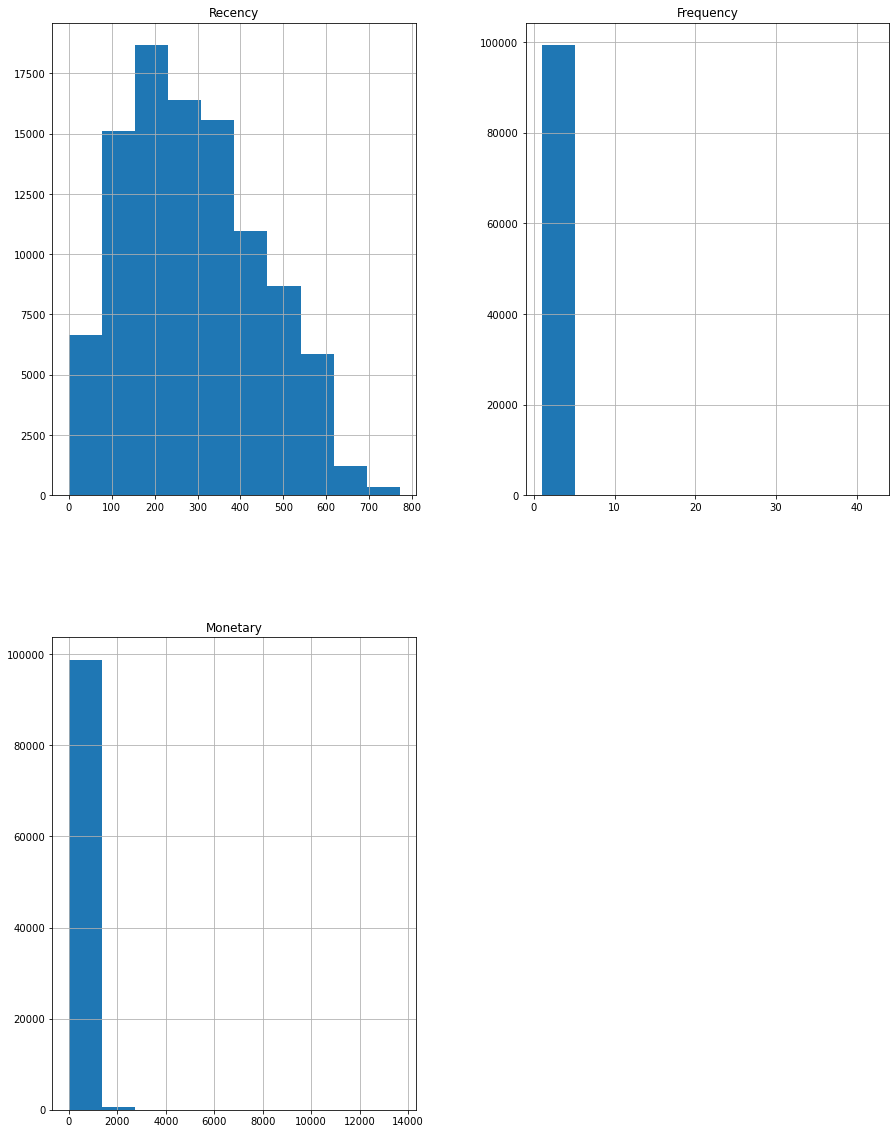

In [16]:
RFMScores.hist(figsize=(15,20))

In [17]:
#Split into three segment using quantiles
quantiles = RFMScores.quantile([0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [18]:
quantiles

{'Recency': {0.25: 166.0, 0.5: 271.0, 0.75: 400.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 62.25, 0.5: 105.95, 0.75: 178.71}}

In [19]:
# Functions to create R, F, M segments
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMcoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [20]:
RFMScores['R'] = RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(Rscoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(Rscoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,337,1,114.74,3,1,3
000161a058600d5901f007fab4c27140,458,1,67.41,4,1,2
0001fd6190edaaf884bcaf3d49edf079,596,1,195.42,4,1,4
0002414f95344307404f0ace7a26f1d5,427,1,179.35,4,1,4
000379cdec625522490c315e70c7a9fb,198,1,107.01,2,1,3


In [21]:
# SHow show column combined concatenante column score
RFMScores['RFMgroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Total sum of RFMgroup

RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis = 1)
RFMScores['RFMScore'].unique()

array([ 7,  9,  6,  4,  5,  8, 11,  3, 12, 10], dtype=int64)

In [22]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,337,1,114.74,3,1,3,313,7
000161a058600d5901f007fab4c27140,458,1,67.41,4,1,2,412,7
0001fd6190edaaf884bcaf3d49edf079,596,1,195.42,4,1,4,414,9
0002414f95344307404f0ace7a26f1d5,427,1,179.35,4,1,4,414,9
000379cdec625522490c315e70c7a9fb,198,1,107.01,2,1,3,213,6
...,...,...,...,...,...,...,...,...
fffecc9f79fd8c764f843e9951b11341,202,3,81.36,2,4,2,242,8
fffeda5b6d849fbd39689bb92087f431,148,1,63.13,1,1,2,112,4
ffff42319e9b2d713724ae527742af25,126,1,214.13,1,1,4,114,6


In [23]:
#Assign fidelity level to each customer

fidelity_level = ['Star_Platinum','Golden_Wind','Silver_Moon','Crystal_Boy']
score_cuts = pd.qcut(RFMScores.RFMScore, q=4,labels = fidelity_level)
RFMScores['RFM_Fidelity_Level'] = score_cuts.values
RFMScores.reset_index()
# RFMScores['RFMgroup'].value_counts(ascending=False)


,customer_id,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore,RFM_Fidelity_Level
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74,3,1,3,313,7,Silver_Moon
1,000161a058600d5901f007fab4c27140,458,1,67.41,4,1,2,412,7,Silver_Moon
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42,4,1,4,414,9,Crystal_Boy
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35,4,1,4,414,9,Crystal_Boy
4,000379cdec625522490c315e70c7a9fb,198,1,107.01,2,1,3,213,6,Golden_Wind
...,...,...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,202,3,81.36,2,4,2,242,8,Crystal_Boy
99437,fffeda5b6d849fbd39689bb92087f431,148,1,63.13,1,1,2,112,4,Star_Platinum
99438,ffff42319e9b2d713724ae527742af25,126,1,214.13,1,1,4,114,6,Golden_Wind
99439,ffffa3172527f765de70084a7e53aae8,410,1,45.50,4,1,1,411,6,Golden_Wind


<AxesSubplot:>

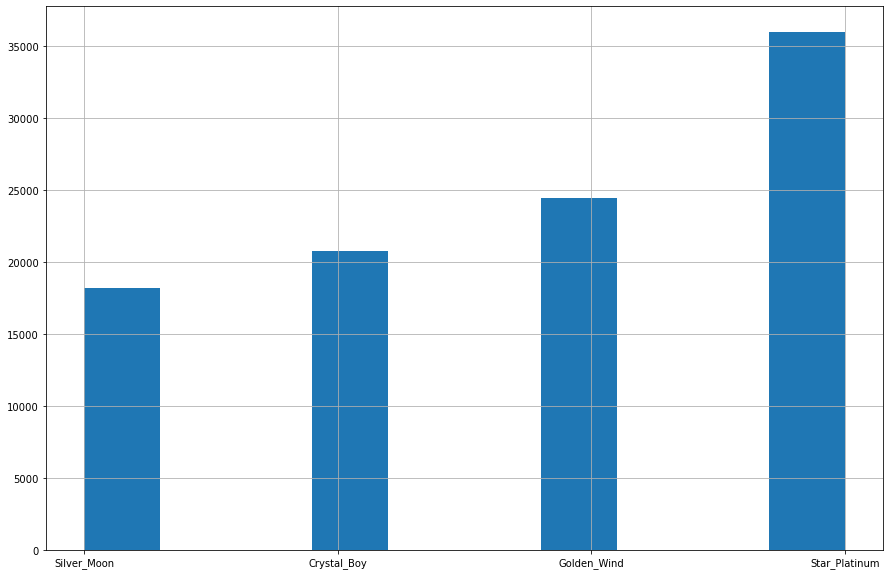

In [24]:
RFMScores['RFM_Fidelity_Level'].hist(figsize=(15,10))

In [25]:
rfm_and_base = RFMScores.merge(df, left_on='customer_id', right_on='customer_id')

In [26]:
rfm_and_base

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore,RFM_Fidelity_Level,...,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74,3,1,3,313,7,Silver_Moon,...,2017-11-14 16:08:26,credit_card,8.0,114.74,1,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,toys
1,000161a058600d5901f007fab4c27140,458,1,67.41,4,1,2,412,7,Silver_Moon,...,2017-07-16 09:40:32,credit_card,5.0,67.41,4,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,health_beauty
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42,4,1,4,414,9,Crystal_Boy,...,2017-02-28 11:06:43,credit_card,10.0,195.42,5,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,baby
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35,4,1,4,414,9,Crystal_Boy,...,2017-08-16 13:09:20,boleto,1.0,179.35,5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,cool_stuff
4,000379cdec625522490c315e70c7a9fb,198,1,107.01,2,1,3,213,6,Golden_Wind,...,2018-04-02 13:42:17,boleto,1.0,107.01,4,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,fffecc9f79fd8c764f843e9951b11341,202,3,81.36,2,4,2,242,8,Crystal_Boy,...,2018-03-29 16:59:26,voucher,1.0,71.23,3,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,bed_bath_table
105379,fffeda5b6d849fbd39689bb92087f431,148,1,63.13,1,1,2,112,4,Star_Platinum,...,2018-05-22 13:36:02,credit_card,3.0,63.13,4,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,telephony
105380,ffff42319e9b2d713724ae527742af25,126,1,214.13,1,1,4,114,6,Golden_Wind,...,2018-06-13 16:57:05,credit_card,2.0,214.13,5,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,bed_bath_table
105381,ffffa3172527f765de70084a7e53aae8,410,1,45.50,4,1,1,411,6,Golden_Wind,...,2017-09-02 11:53:32,credit_card,4.0,45.50,5,48fd7dec70f2b104a1d5e8c5c639102b,37130,alfenas,MG,furniture_decor


# Working with cohorts

❓What is a cohort? 

Cohort analysis is a kind of behavioral analytics that breaks the data in a data set into related groups before analysis

❓Why is it interesting to analyse cohorts ? 

Cohort analysis allows a company to "see patterns clearly across the life-cycle of a customer (or user), rather than slicing across all customers blindly without accounting for the natural cycle that a customer undergoes
(L’analyse de cohorte permet à une entreprise de « voir clairement les tendances tout au long du cycle de vie d’un client (ou d’un utilisateur), plutôt que de trancher tous les clients aveuglément sans tenir compte du cycle naturel qu’un client subit)

❓What data (already existing in the original dataset) do we need to build a cohort? 

- order_purchase_timestamp
- order_id
- customer_unique_id

Build a new df with just these 3 features

In [27]:
df_cohort = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [28]:
df_cohort['order_time_month'] = df_cohort['order_purchase_timestamp'].dt.to_period('M')

In [29]:
df_cohort['cohort'] = df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M') 

In [30]:
df_cohort

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,2017-09
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07,2018-07
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08,2018-08
5,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11,2017-11
6,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02,2018-02
...,...,...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03,2017-03
105379,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02,2018-02
105380,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08,2017-08
105381,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01,2018-01


Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [31]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_cohort.groupby('customer_unique_id').size()[df_cohort.groupby('customer_unique_id').size() > 1])
df_cohort = df_cohort.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_cohort = df_cohort[df_cohort['na'].notna()]

In [32]:
df_cohort

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month,cohort,na
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,2017-09,2.0
15,ccafc1c3f270410521c3c6f3b249870f,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,2018-06,2016-10,2.0
16,6e26bbeaa107ec34112c64e1ee31c0f5,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43,2018-01,2017-07,2.0
44,08fb46d35bb3ab4037202c23592d1259,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,2018-06,2018-06,2.0
46,c2551ea089b7ebbc67a2ea8757152514,d17dc4a904426827ca80f2ccb3a6be56,2017-05-14 20:28:25,2017-05,2017-05,2.0
...,...,...,...,...,...,...
99307,62b8761192c86f4ead06f4a433096a2b,58edf3f5f282ab91e0f6a6f2b85af02a,2018-05-07 09:01:58,2018-05,2018-05,2.0
99344,dca9a13536adcef18c6c5859487347b1,bfecb4ee6ab98bff69307aab578db48a,2018-03-17 12:52:37,2018-03,2017-12,2.0
99347,d05c44a138277ad325d915c6b7ccbcdf,a89abace0dcc01eeb267a9660b5ac126,2018-09-06 18:45:47,2018-09,2018-08,2.0
99419,39fff7cb5873a7116b02234bd1e6c6dc,1b4a0e6b19d0034b531655b41ea89623,2017-10-02 08:45:35,2017-10,2017-10,2.0


In [33]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

NameError: name 'df_c' is not defined

Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [ ]:
df_c = df_cohort.groupby(['cohort', 'order_time_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [ ]:
# import attrgetter
from operator import attrgetter
df_c['period_month'] = (df_c.order_time_month - df_c.cohort).apply(attrgetter('n'))

Explore a cohort (for example 2017-01) and try to understand what it shows

In [ ]:
view = df_c[df_c["cohort"] == '2017-01']
view

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [ ]:
cohort_pivot = df_c.pivot_table(index = 'cohort', columns = 'period_month',values = 'n_customers')
cohort_pivot

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [ ]:
df_c

Plot your `retention matrix` using the code below : 

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 15), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [ ]:
n_orders = df.groupby(['customer_unique_id'])['order_id'].nunique()
orders_perc2 = np.sum(n_orders > 1) / df['customer_unique_id'].nunique()
# 3,12% of customers have ordered more than once
orders_perc2*100

Here is the code for the analysis of customers who have bought more than once : 

In [ ]:
#start from your df created doing the RFM segmentation
df_d = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_d['order_month'] = df_d['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_d.groupby('customer_unique_id').size()[
                       df_d.groupby('customer_unique_id').size() > 1])

df_d = df_d.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_d = df_d[df_d['na'].notna()]
df_d['cohort'] = df_d.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()